This notebook demonistrate how to classify sign language using CNN model with Keras

In [1]:
#importing libraries
import numpy as np 
import pandas as pd
import random as rd

#data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from PIL import Image

#for the CNN model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from keras.preprocessing.image import ImageDataGenerator
from numpy.random import seed
seed(10)
tf.random.set_seed(20)

#for viewing filenames
import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#load data
train_dir = '../input/asl-alphabet/asl_alphabet_train/asl_alphabet_train'
test_dir = '../input/asl-alphabet/asl_alphabet_test/asl_alphabet_test'

In [3]:
#Get images labels
import cv2
def get_data(data_dir) :
    images = []
    labels = []
    
    dir_list = os.listdir(data_dir)
    for i in range(len(dir_list)):
        print("Obtaining images of", dir_list[i], "...")
        for image in os.listdir(data_dir + "/" + dir_list[i]):
            img = cv2.imread(data_dir + '/' + dir_list[i] + '/' + image)
            img = cv2.resize(img, (32, 32))
            images.append(img)
            labels.append(i)
    
    return images, labels
        
X, y = get_data(train_dir)

Obtaining images of N ...
Obtaining images of R ...
Obtaining images of space ...
Obtaining images of B ...
Obtaining images of I ...
Obtaining images of del ...
Obtaining images of F ...
Obtaining images of H ...
Obtaining images of E ...
Obtaining images of U ...
Obtaining images of M ...
Obtaining images of X ...
Obtaining images of K ...
Obtaining images of Q ...
Obtaining images of Y ...
Obtaining images of S ...
Obtaining images of G ...
Obtaining images of A ...
Obtaining images of O ...
Obtaining images of T ...
Obtaining images of V ...
Obtaining images of Z ...
Obtaining images of C ...
Obtaining images of P ...
Obtaining images of L ...
Obtaining images of W ...
Obtaining images of D ...
Obtaining images of nothing ...
Obtaining images of J ...


In [4]:
print(len(X), len(y))

87000 87000


In [5]:
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 
           'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 
           'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']

<Figure size 640x480 with 0 Axes>

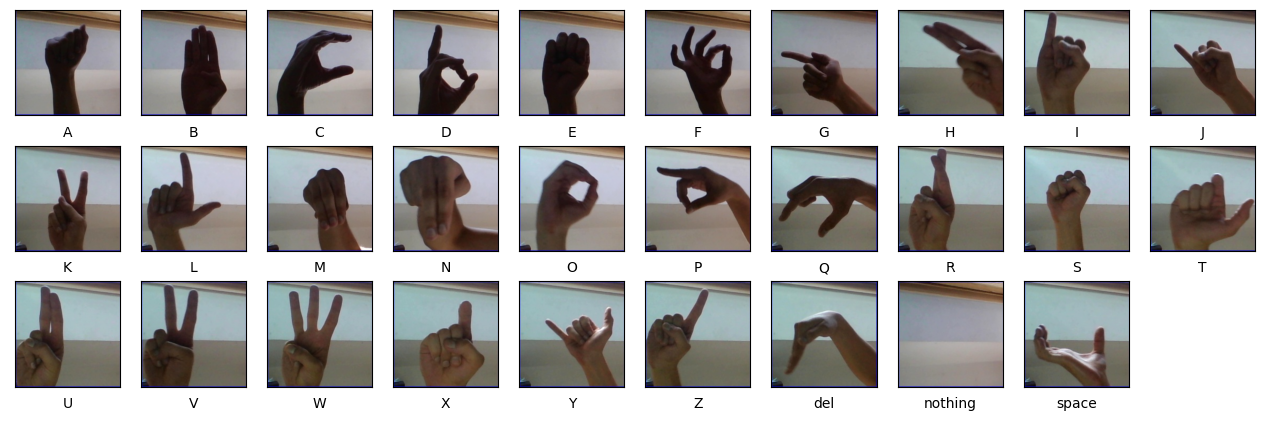

In [6]:
#plot sample of data for specific classes
def plot_sample_images():
    figure = plt.figure()
    plt.figure(figsize=(16,5))

    for i in range (0,29):
        plt.subplot(3,10,i+1)
        plt.xticks([])
        plt.yticks([])
        path = train_dir + "/{0}/{0}1.jpg".format(classes[i])
        img = plt.imread(path)
        plt.imshow(img)
        plt.xlabel(classes[i])
        
plot_sample_images()

In [7]:
#devide data into training and testing data
from tensorflow.keras import utils
def preprocess_data(X, y):
    np_X = np.array(X)
    normalised_X = np_X.astype('float32')/255.0
    
    label_encoded_y = utils.to_categorical(y)
    
    x_train, x_test, y_train, y_test = train_test_split(normalised_X, label_encoded_y, test_size = 0.2)
    
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = preprocess_data(X, y)

In [8]:
print("Training data:", x_train.shape)
print("Test data:", x_test.shape)

Training data: (69600, 32, 32, 3)
Test data: (17400, 32, 32, 3)


In [9]:
#creating our CNN model
model = keras.Sequential([
    
    layers.BatchNormalization(),
    layers.Conv2D(filters=32, kernel_size=(5,5), activation="relu", padding='same',
                  input_shape=[32, 32, 3]),
    layers.MaxPool2D(),
    layers.Dropout(.25),
    
    layers.BatchNormalization(),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(.25),
    
    layers.BatchNormalization(),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(.25),
    
    layers.BatchNormalization(),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(.25),
    
    layers.Flatten(),
    layers.Dropout(.25),
    layers.Dense(units=64, activation="relu"),
    layers.Dense(units=29, activation="softmax"),
])

    

In [10]:
#compiling the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
# #Training the model
history = model.fit(x_train, 
                    y_train, 
                    batch_size=29, 
                    epochs=30, 
                    validation_split=0.2, 
                    verbose=2).history

Epoch 1/30


2023-05-09 13:07:46.406594: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1920/1920 - 20s - loss: 2.1591 - accuracy: 0.3363 - val_loss: 0.8877 - val_accuracy: 0.7001 - 20s/epoch - 10ms/step
Epoch 2/30
1920/1920 - 10s - loss: 0.8228 - accuracy: 0.7117 - val_loss: 0.3598 - val_accuracy: 0.8859 - 10s/epoch - 5ms/step
Epoch 3/30
1920/1920 - 11s - loss: 0.4985 - accuracy: 0.8232 - val_loss: 0.2357 - val_accuracy: 0.9251 - 11s/epoch - 5ms/step
Epoch 4/30
1920/1920 - 10s - loss: 0.3723 - accuracy: 0.8672 - val_loss: 0.1189 - val_accuracy: 0.9693 - 10s/epoch - 5ms/step
Epoch 5/30
1920/1920 - 10s - loss: 0.3005 - accuracy: 0.8935 - val_loss: 0.0991 - val_accuracy: 0.9728 - 10s/epoch - 5ms/step
Epoch 6/30
1920/1920 - 10s - loss: 0.2581 - accuracy: 0.9097 - val_loss: 0.0756 - val_accuracy: 0.9809 - 10s/epoch - 5ms/step
Epoch 7/30
1920/1920 - 10s - loss: 0.2195 - accuracy: 0.9217 - val_loss: 0.0479 - val_accuracy: 0.9878 - 10s/epoch - 5ms/step
Epoch 8/30
1920/1920 - 10s - loss: 0.1961 - accuracy: 0.9309 - val_loss: 0.0428 - val_accuracy: 0.9894 - 10s/epoch - 5ms/step
Ep

Now let’s have a quick look at how our model is going to behave based on its accuracy and loss changes while training:

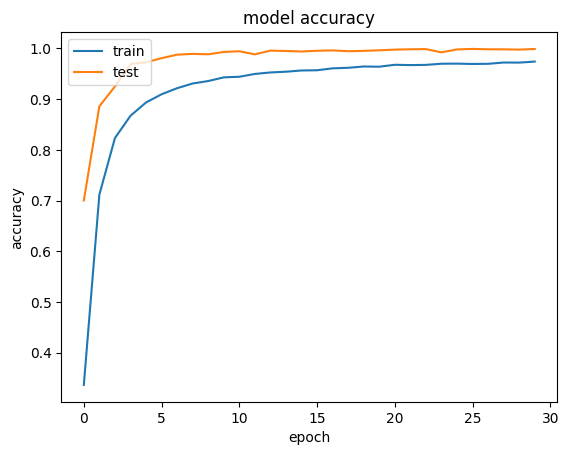

In [12]:
#plot accuracy behavior
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

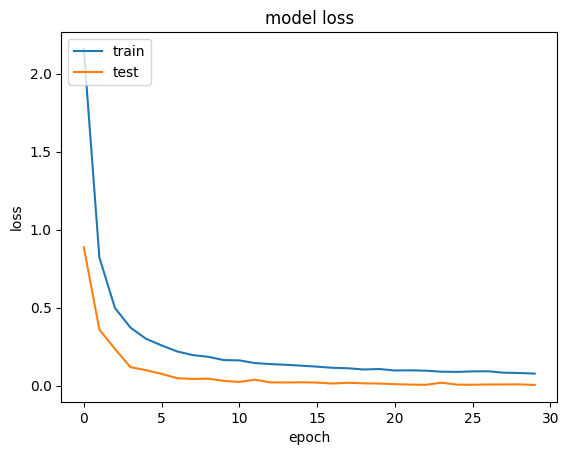

In [13]:
#plot loss behavior
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')